**Imagine you work for a company that develops mobile games.
A manager comes to you with a series of tasks to research several aspects of a mobile application:**

# Task 1

---


Retention is one of the most important metrics in a company. Your task is to write a function that will count the retention of players (by days from the date of player registration).


In [ ]:
# import all nesessary libraries
import pandas as pd
import datetime
from datetime import date, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# import first dataset
df = pd.read_csv(r'/content/problem1-reg_data.csv', sep = ';')

In [ ]:
df.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [ ]:
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-oks/shared/problem1-auth_data.csv', sep = ';')

In [ ]:
# import second dataset
df2.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [ ]:
df = df.merge(df2, how = 'outer', on = 'uid')

In [ ]:
df = df[['uid', 'reg_ts', 'auth_ts']]

In [ ]:
df.dtypes

uid        int64
reg_ts     int64
auth_ts    int64
dtype: object

In [ ]:
# convert reg_ts and auth_ts format to date
df['reg_ts'] = [datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df['reg_ts']]
df['auth_ts'] = [datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df['auth_ts']]

In [ ]:
df.head()

,uid,reg_ts,auth_ts
0,1,1998-11-18,1998-11-18
1,2,1999-07-22,1999-07-22
2,2,1999-07-22,1999-07-25
3,2,1999-07-22,1999-07-31
4,2,1999-07-22,1999-08-05


In [ ]:
df.reg_ts = df.reg_ts.astype('Datetime64')
df.auth_ts = df.auth_ts.astype('Datetime64')

In [ ]:
df.dtypes

uid                 int64
reg_ts     datetime64[ns]
auth_ts    datetime64[ns]
dtype: object

In [ ]:
# Count players (by days from the player's registration date)
def RR (reg_ts, auth_ts):
    df['rr_day'] = (df['auth_ts'] - df['reg_ts']).dt.days + 1
    cohorts = df.groupby(['reg_ts', 'rr_day'], as_index = False).agg({'uid':'nunique'}).pivot(index='reg_ts', columns='rr_day', values='uid')[reg_ts:auth_ts]

    base = cohorts[1]
    retention = cohorts.divide(base, axis=0).round(3)

    plt.figure(figsize=(18,12))
    ax = sns.heatmap(data=retention.iloc[:,0:31], annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')

    return cohorts.iloc[:,0:31]

In [ ]:
df.reg_ts.min()

Timestamp('1998-11-18 00:00:00')

In [ ]:
df.reg_ts.max()

Timestamp('2020-09-23 00:00:00')

We can see that the period given is over 20 years, so let's see how the new player registration activity was distributed on the graph

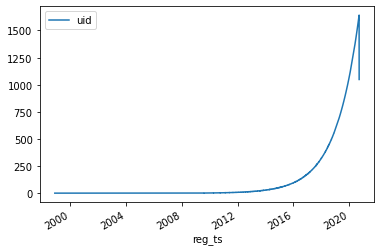

In [ ]:
df.groupby('reg_ts').agg({'uid':'nunique'}).plot()

Since the dataset is very large, let's check on a sample of data from January 2019
(when new users started to join the game actively)

rr_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
reg_ts,,,,,,,,,,,,,,,,,,,,,
2019-01-01,583.0,12.0,22.0,29.0,26.0,37.0,48.0,34.0,32.0,35.0,...,32.0,18.0,25.0,22.0,19.0,25.0,21.0,24.0,17.0,13.0
2019-01-02,583.0,10.0,29.0,21.0,29.0,47.0,32.0,41.0,18.0,24.0,...,21.0,23.0,21.0,13.0,19.0,14.0,23.0,11.0,18.0,14.0
2019-01-03,585.0,10.0,18.0,26.0,35.0,37.0,38.0,34.0,13.0,29.0,...,20.0,21.0,14.0,22.0,25.0,19.0,25.0,16.0,13.0,12.0
2019-01-04,585.0,16.0,22.0,25.0,32.0,32.0,47.0,31.0,25.0,31.0,...,25.0,21.0,19.0,17.0,26.0,22.0,22.0,19.0,11.0,20.0
2019-01-05,586.0,11.0,24.0,27.0,29.0,48.0,42.0,41.0,35.0,24.0,...,25.0,31.0,16.0,28.0,17.0,23.0,24.0,24.0,19.0,21.0
2019-01-06,588.0,10.0,22.0,31.0,28.0,35.0,33.0,34.0,31.0,28.0,...,16.0,23.0,21.0,23.0,22.0,15.0,13.0,20.0,18.0,11.0
2019-01-07,588.0,10.0,25.0,24.0,32.0,43.0,43.0,39.0,32.0,32.0,...,23.0,25.0,21.0,15.0,20.0,19.0,21.0,15.0,12.0,15.0
2019-01-08,589.0,18.0,24.0,30.0,34.0,42.0,42.0,39.0,34.0,23.0,...,26.0,22.0,22.0,22.0,24.0,19.0,21.0,12.0,21.0,13.0
2019-01-09,590.0,6.0,16.0,25.0,31.0,35.0,38.0,26.0,34.0,30.0,...,24.0,23.0,20.0,20.0,23.0,10.0,15.0,21.0,13.0,18.0


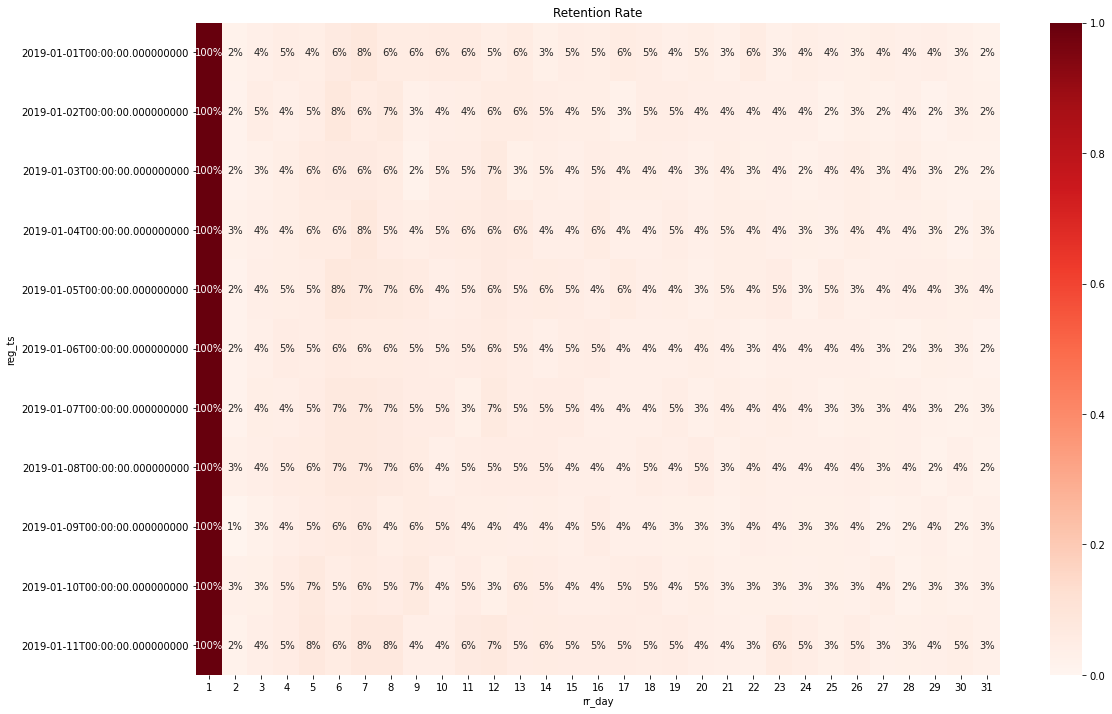

In [ ]:
RR('2019-01-01', '2019-01-11')

## Task 2

**There are results of A/B test, in which two groups of users were offered different sets of promotional offers.
It is known that ARPU in the test group is 5% higher than in the control group.
At the same time in the control group 1928 players out of 202103 turned out to be paying players, and in the test group - 1805 out of 202667.**

**Which set of offers can be considered the best? What metrics should be analyzed to make the right decision and how?**

It is worth analyzing several metrics to determine the best set of offers:

1. ARPU. It is known that in the studied case ARPU in the test group is 5% higher than in the control group,
which shows that the test offer is more effective.

2. Conversion. It helps to determine how effective the test offer was.

3. Average check. By its sum it is possible to draw conclusions about customer loyalty.

In [ ]:
# import dataset
ab = pd.read_csv('Проект_1_Задание_2.csv', sep = ';')

In [ ]:
ab.head(10)

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
7,8,0,b
8,9,0,b
9,10,0,a


In [ ]:
сontrol_сr = ab.query('testgroup == "a" & revenue > 0').agg({'revenue':'count'})/ab.query('testgroup == "a"').agg({'revenue':'count'})

In [ ]:
сontrol_сr*100

revenue    0.953969
dtype: float64

In [ ]:
test_сr = ab.query('testgroup == "b" & revenue > 0').agg({'revenue':'count'})/ab.query('testgroup == "b"').agg({'revenue':'count'})
test_сr*100

revenue    0.890624
dtype: float64



---



---


Conversion in the control group is 0.953 and in the test group is 0.891.
Thus, the best results are brought by the control group.

In [ ]:
control_av_pay = ab.query('testgroup == "a" & revenue > 0').agg({'revenue':'sum'})/ab.query('testgroup == "a"').agg({'revenue':'count'})
control_av_pay

revenue    25.41372
dtype: float64

In [ ]:
test_av_pay = ab.query('testgroup == "b" & revenue > 0').agg({'revenue':'sum'})/ab.query('testgroup == "b"').agg({'revenue':'count'})
test_av_pay

revenue    26.751287
dtype: float64



---

The average check of the control group is less than that of the test group,
we can conclude that the test set is more effective.

We do not know whether our metrics have changed randomly or whether it is a consequence of the applied changes.
We need to check whether the metrics in the two groups differ statistically significantly.

In [ ]:
# Let's check our samples for normality, divide the dataset into 2 groups
a = ab.query('testgroup == "a"')
b = ab.query('testgroup == "b"')

In [ ]:
stats.shapiro(a.revenue)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.008876502513885498, pvalue=0.0)

In [ ]:
stats.shapiro(b.revenue)

ShapiroResult(statistic=0.06588172912597656, pvalue=0.0)

Both distributions are not significantly different from the normal distribution,
so we can test whether the revenues in our samples are statistically significantly different using the
Student's t-test

H0 - no differences

H1 - there are differences

In [ ]:
stats.ttest_ind(a.revenue, b.revenue)

Ttest_indResult(statistic=-0.6242026493616787, pvalue=0.532494858971837)

In [ ]:
stats. mannwhitneyu (a.revenue, b.revenue, alternative='two-sided')

MannwhitneyuResult(statistic=20491259376.0, pvalue=0.06269701316074398)

Since p > 0.05, we cannot reject H0, which means there is no significant difference of revenue in the samples.




**Conclusion**: According to the test results we can see that ARPU in the test group is higher by 5%,
but at the same time conversion to purchase is higher in the control group. At the same time, the average check in the control group was lower.

Based on this, we can say that the set of offers in the test group should be considered the best,
as it has a higher ARPU.

But to make a decision, it is also worth paying attention to user engagement and user feedback.
If the test set provides not only an increase in ARPU, but also positive changes in user involvement
and user feedback, then there's a chance
that this set of promotional offers generates more revenue for the company.

But after comparing the two groups for statistically significant differences, it turns out,
that there were no significant differences in revenue between the test and control groups.
This may indicate that our metrics may have changed randomly.

I would recommend extending the experiment or increasing the sample.

# Task 3

The Plants & Gardens game features themed events every month, limited in time.

In them, players can get unique items for the garden and characters, additional coins or bonuses.
The rewards require completing a series of levels in a certain amount of time.

What metrics can be used to evaluate the results of the last event that took place?

The metrics for evaluating the past event will be as follows:

    1. Percentage of players who participated in the event as a percentage of the total number of players.
    2. Average time to complete levels.
    3. The ratio of levels completed to the total number of levels.
    4. Percentage of players who completed the event in a given time.
    5. Player feedback: analyze player feedback on the event.
    6. Retention at each level
    7. Player churn at each level.

Suppose, in another event, we complicated the event mechanics so that,
that every time a player fails to complete a level, the player will roll back a few levels.

**Would the set of outcome evaluation metrics change? If so, how?**

Yes, the set of outcome evaluation metrics will change.
It will include additional coefficients (to those above) such as:

    1. the number of attempts spent by the player when completing levels. This will help us determine how difficult the levels are in the challenge.
    2. the average time to complete a level, including the time taken to repeat the level
    3. player satisfaction with a particular event, i.e. how many players return for the next themed event.
    4. the number of rollbacks among successfully completed levels